In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (13,7)
plt.style.use('fivethirtyeight')

#to show all columns
pd.set_option('display.max.columns', 40)

In [2]:
df = pd.read_csv('C:\\Users\\JASIM\\Documents\\Coding\\DataSet\\Financial\\sales_data_sample.csv', encoding='ISO-8859-1')

In [3]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


# Overview data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [5]:
df.duplicated().sum()

0

In [6]:
df.shape

(2823, 25)

In [7]:
for col in df.columns:
    print(f'The number of unique values in {col}: {df[col].nunique()}')


The number of unique values in ORDERNUMBER: 307
The number of unique values in QUANTITYORDERED: 58
The number of unique values in PRICEEACH: 1016
The number of unique values in ORDERLINENUMBER: 18
The number of unique values in SALES: 2763
The number of unique values in ORDERDATE: 252
The number of unique values in STATUS: 6
The number of unique values in QTR_ID: 4
The number of unique values in MONTH_ID: 12
The number of unique values in YEAR_ID: 3
The number of unique values in PRODUCTLINE: 7
The number of unique values in MSRP: 80
The number of unique values in PRODUCTCODE: 109
The number of unique values in CUSTOMERNAME: 92
The number of unique values in PHONE: 91
The number of unique values in ADDRESSLINE1: 92
The number of unique values in ADDRESSLINE2: 9
The number of unique values in CITY: 73
The number of unique values in STATE: 16
The number of unique values in POSTALCODE: 73
The number of unique values in COUNTRY: 19
The number of unique values in TERRITORY: 3
The number of 

# Cleaning the data 

In [8]:
df.isnull().sum()/ len(df)*100

ORDERNUMBER          0.000000
QUANTITYORDERED      0.000000
PRICEEACH            0.000000
ORDERLINENUMBER      0.000000
SALES                0.000000
ORDERDATE            0.000000
STATUS               0.000000
QTR_ID               0.000000
MONTH_ID             0.000000
YEAR_ID              0.000000
PRODUCTLINE          0.000000
MSRP                 0.000000
PRODUCTCODE          0.000000
CUSTOMERNAME         0.000000
PHONE                0.000000
ADDRESSLINE1         0.000000
ADDRESSLINE2        89.302161
CITY                 0.000000
STATE               52.639036
POSTALCODE           2.692171
COUNTRY              0.000000
TERRITORY           38.044633
CONTACTLASTNAME      0.000000
CONTACTFIRSTNAME     0.000000
DEALSIZE             0.000000
dtype: float64

In [9]:
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

* There is some columns that we dont need it in our analysis
* such as ADDRESSLINE2 and more

In [10]:
df = df.drop(columns = ['ORDERNUMBER', 
         'PRODUCTCODE','ADDRESSLINE2', 'QTR_ID', 'MONTH_ID'
                        ,# 'CUSTOMERNAME', 
                        'PHONE',
        'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       ])

In [11]:
df.duplicated().sum()

0

In [12]:
df['ORDERDATE'] = df['ORDERDATE'].str.split(" ").str.get(0)
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

* I removed a few columns that are not relevant to our analysis. 
* I considered removing the ADDRESSLINE column, but ultimately decided to keep it. 
* Furthermore, there are no duplicate values in the dataset.
* We edit ordetime and chnage it its dtypes to datetime

In [13]:
df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,YEAR_ID,PRODUCTLINE,MSRP,CUSTOMERNAME,ADDRESSLINE1,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,DEALSIZE
0,30,95.70,2,2871.00,2003-02-24,Shipped,2003,Motorcycles,95,Land of Toys Inc.,897 Long Airport Avenue,NYC,NY,10022,USA,NaN,Small
1,34,81.35,5,2765.90,2003-05-07,Shipped,2003,Motorcycles,95,Reims Collectables,59 rue de l'Abbaye,Reims,NaN,51100,France,EMEA,Small
2,41,94.74,2,3884.34,2003-07-01,Shipped,2003,Motorcycles,95,Lyon Souveniers,27 rue du Colonel Pierre Avia,Paris,NaN,75508,France,EMEA,Medium
3,45,83.26,6,3746.70,2003-08-25,Shipped,2003,Motorcycles,95,Toys4GrownUps.com,78934 Hillside Dr.,Pasadena,CA,90003,USA,NaN,Medium
4,49,100.00,14,5205.27,2003-10-10,Shipped,2003,Motorcycles,95,Corporate Gift Ideas Co.,7734 Strong St.,San Francisco,CA,NaN,USA,NaN,Medium


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   QUANTITYORDERED  2823 non-null   int64         
 1   PRICEEACH        2823 non-null   float64       
 2   ORDERLINENUMBER  2823 non-null   int64         
 3   SALES            2823 non-null   float64       
 4   ORDERDATE        2823 non-null   datetime64[ns]
 5   STATUS           2823 non-null   object        
 6   YEAR_ID          2823 non-null   int64         
 7   PRODUCTLINE      2823 non-null   object        
 8   MSRP             2823 non-null   int64         
 9   CUSTOMERNAME     2823 non-null   object        
 10  ADDRESSLINE1     2823 non-null   object        
 11  CITY             2823 non-null   object        
 12  STATE            1337 non-null   object        
 13  POSTALCODE       2747 non-null   object        
 14  COUNTRY          2823 non-null   object 

# Data Exploration And visualization

## Which product category has the highest sales and Revenue?

In [15]:
df['TOTAL_REVENUE'] = df['QUANTITYORDERED'] * df["PRICEEACH"]

In [16]:
# Group the data by product category and sum up the revenue and sales
category_sales = df.groupby('PRODUCTLINE').agg({"QUANTITYORDERED": "sum", "PRICEEACH":"sum", "SALES": "sum"})

# Find the product category with the highest sales
max_sales_category = category_sales["SALES"].idxmax()

print(f"The product category with the highest sales is \
{max_sales_category} with a total sales of ${category_sales.loc[max_sales_category]['SALES']}")

The product category with the highest sales is Classic Cars with a total sales of $3919615.66


In [17]:
# Group the data by product category and sum up the revenue and sales
category_sales = df.groupby('PRODUCTLINE').agg({"QUANTITYORDERED": "sum", "PRICEEACH":"sum", "TOTAL_REVENUE": "sum"})

# Find the product category with the highest sales
max_sales_category = category_sales["TOTAL_REVENUE"].idxmax()

print(f"The product category with the highest Revenue is \
{max_sales_category} with a total Revenue of ${category_sales.loc[max_sales_category]['TOTAL_REVENUE']}")

The product category with the highest Revenue is Classic Cars with a total Revenue of $2968546.4


In [18]:
#df.agg[[, 'TOTAL_REVENUE']]

df.groupby("PRODUCTLINE").agg({"SALES":'sum', 'TOTAL_REVENUE': 'sum'})

,SALES,TOTAL_REVENUE
PRODUCTLINE,,
Classic Cars,3919615.66,2968546.40
Motorcycles,1166388.34,971086.29
Planes,975003.57,877942.21
Ships,714437.13,677940.40
Trains,226243.47,203804.26
Trucks and Buses,1127789.84,947355.18
Vintage Cars,1903150.84,1644212.05


## What is the total revenue generated by the company in a given period of time?

In [19]:
start_date = '2003-01-06'
end_date = '2005-05-31'
revenue_period = df.loc[(df['ORDERDATE'] >= start_date) & (df['ORDERDATE'] <= end_date), 'TOTAL_REVENUE'].sum()
print("Total revenue generated by the company between {} and {}: ${:.2f}".format(start_date, end_date, revenue_period))


Total revenue generated by the company between 2003-01-06 and 2005-05-31: $8290886.79


In [20]:
df.describe()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,YEAR_ID,MSRP,TOTAL_REVENUE
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000,2823.000000
mean,35.092809,83.658544,6.466171,3553.889072,2003.81509,100.715551,2936.906408
std,9.741443,20.174277,4.225841,1841.865106,0.69967,40.187912,1105.644284
min,6.000000,26.880000,1.000000,482.130000,2003.00000,33.000000,482.130000
25%,27.000000,68.860000,3.000000,2203.430000,2003.00000,68.000000,2100.000000
50%,35.000000,95.700000,6.000000,3184.800000,2004.00000,99.000000,2800.000000
75%,43.000000,100.000000,9.000000,4508.000000,2004.00000,124.000000,3726.810000
max,97.000000,100.000000,18.000000,14082.800000,2005.00000,214.000000,9048.160000


<AxesSubplot: >

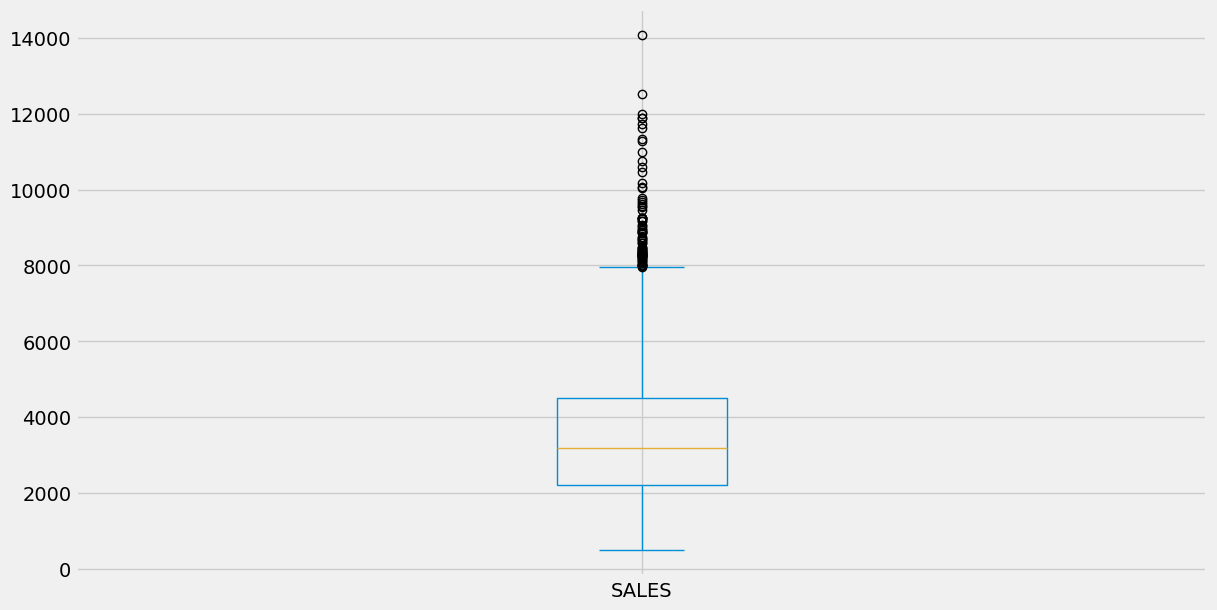

In [21]:
df['SALES'].plot(kind="box")

In [22]:
df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,YEAR_ID,PRODUCTLINE,MSRP,CUSTOMERNAME,ADDRESSLINE1,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,DEALSIZE,TOTAL_REVENUE
0,30,95.70,2,2871.00,2003-02-24,Shipped,2003,Motorcycles,95,Land of Toys Inc.,897 Long Airport Avenue,NYC,NY,10022,USA,NaN,Small,2871.00
1,34,81.35,5,2765.90,2003-05-07,Shipped,2003,Motorcycles,95,Reims Collectables,59 rue de l'Abbaye,Reims,NaN,51100,France,EMEA,Small,2765.90
2,41,94.74,2,3884.34,2003-07-01,Shipped,2003,Motorcycles,95,Lyon Souveniers,27 rue du Colonel Pierre Avia,Paris,NaN,75508,France,EMEA,Medium,3884.34
3,45,83.26,6,3746.70,2003-08-25,Shipped,2003,Motorcycles,95,Toys4GrownUps.com,78934 Hillside Dr.,Pasadena,CA,90003,USA,NaN,Medium,3746.70
4,49,100.00,14,5205.27,2003-10-10,Shipped,2003,Motorcycles,95,Corporate Gift Ideas Co.,7734 Strong St.,San Francisco,CA,NaN,USA,NaN,Medium,4900.00


# Which Region has the highest sales and revenue?

In [23]:
region_sale = df.groupby('TERRITORY')['SALES'].sum()
highest_sale_region = region_sale.idxmax()

print(f"The Highest sale region is {highest_sale_region} with a total Sales: ${region_sale.max()}")

The Highest sale region is EMEA with a total Sales: $4979272.41


In [24]:
region_revenue = df.groupby("TERRITORY")['TOTAL_REVENUE'].sum()
highest_revenue_region = region_revenue.idxmax()

print(f"The Highest Revenue region is {highest_revenue_region} with a total Revenue: ${region_revenue.max()}")

The Highest Revenue region is EMEA with a total Revenue: $4128005.42


## Which Countries has the highest sales?

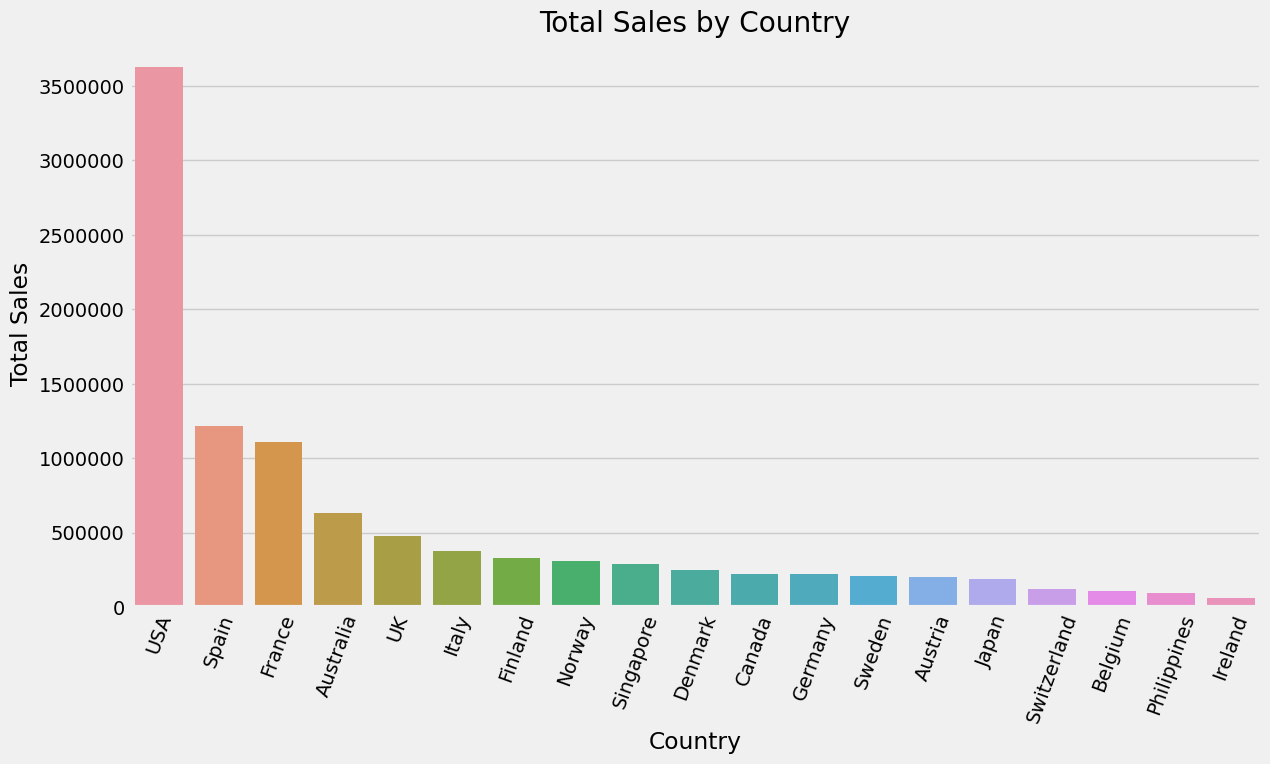

In [25]:
top_highest_sales_country = df.groupby('COUNTRY')['SALES'].sum().sort_values(ascending=False).reset_index()

sns.barplot(x= "COUNTRY", y="SALES", data=top_highest_sales_country)
plt.xticks(rotation=70)
plt.ylabel('Total Sales')
plt.xlabel('Country')
plt.title('Total Sales by Country')
plt.ticklabel_format(style='plain', axis='y')  # format y-axis labels as plain numbers

plt.show()

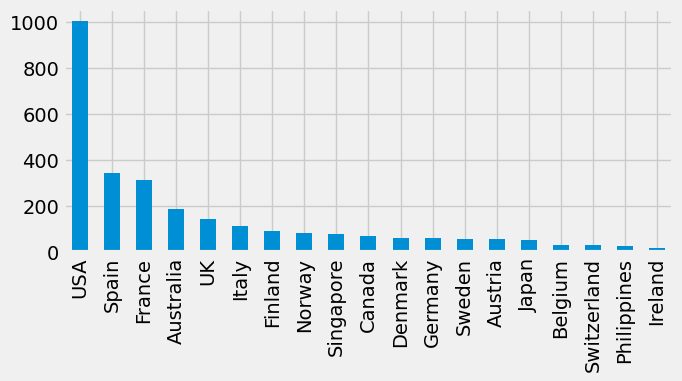

In [26]:
plt.figure(figsize = (7,3))
df['COUNTRY'].value_counts().plot.bar()
plt.show()

## What is the average unit price of each product category?

In [27]:
category_unit_price = df.groupby('PRODUCTLINE')['PRICEEACH'].mean()
print(category_unit_price)


PRODUCTLINE
Classic Cars        87.335781
Motorcycles         82.997553
Planes              81.740915
Ships               83.855470
Trains              75.654675
Trucks and Buses    87.527940
Vintage Cars        78.148204
Name: PRICEEACH, dtype: float64


## What is the distribution of sales across different customer segments?

In [28]:
df.CUSTOMERNAME.nunique()

92

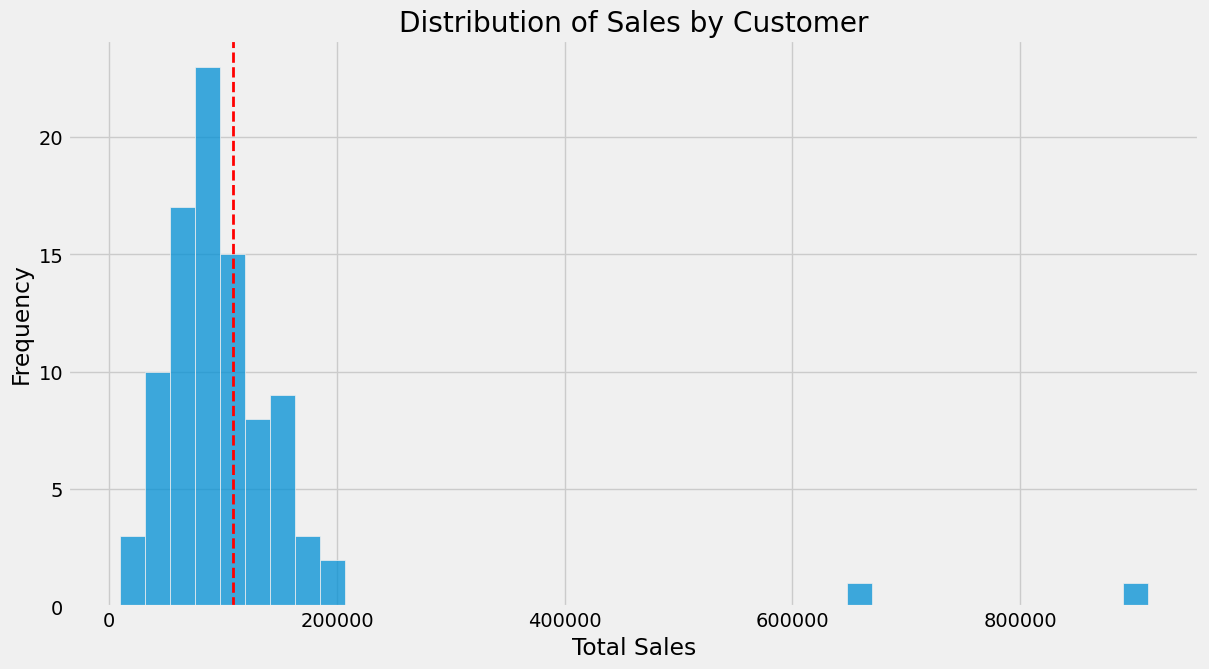

In [29]:
sales_by_customer = df.groupby('CUSTOMERNAME')['SALES'].sum()

mean_sales = sales_by_customer.mean()
sns.histplot(sales_by_customer)

# Add vertical line for mean
plt.axvline(sales_by_customer.mean(), color="red", \
           linestyle="--", linewidth=2)

# Set plot title and labels
plt.title('Distribution of Sales by Customer')
plt.xlabel('Total Sales')
plt.ylabel('Frequency')

plt.show()

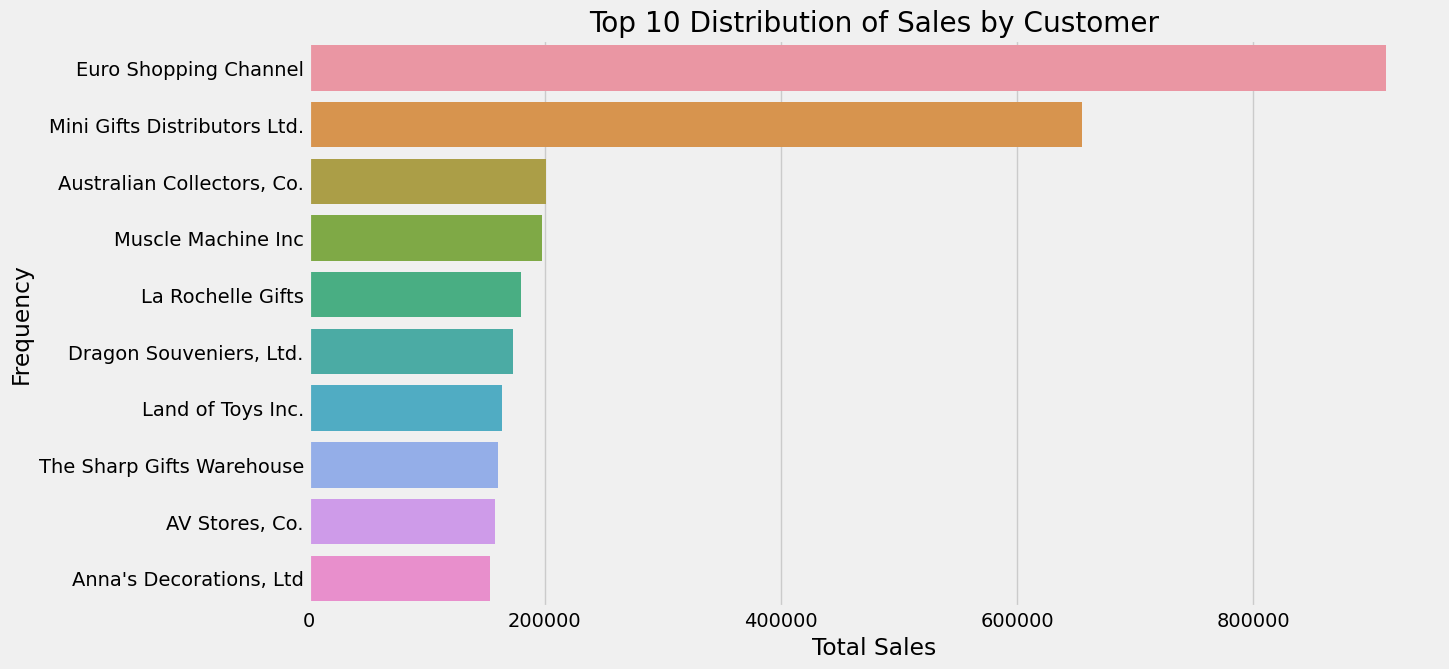

In [30]:
top10_sales_by_customer = df.groupby('CUSTOMERNAME')['SALES'].sum().sort_values\
                                             (ascending=False).head(10).reset_index()

sns.barplot(x='SALES', y='CUSTOMERNAME', 
            data=top10_sales_by_customer)

# Set plot title and labels
plt.title('Top 10 Distribution of Sales by Customer')
plt.xlabel('Total Sales')
plt.ylabel('Frequency')
plt.show()

## What is the average order quantity of each product category?

In [31]:
# Group data by product category and calculate mean of QUANTITYORDERED
avg_quantity = df.groupby('PRODUCTLINE')['QUANTITYORDERED'].mean()

print(avg_quantity)

PRODUCTLINE
Classic Cars        35.152017
Motorcycles         35.235650
Planes              35.055556
Ships               34.730769
Trains              35.220779
Trucks and Buses    35.803987
Vintage Cars        34.710049
Name: QUANTITYORDERED, dtype: float64


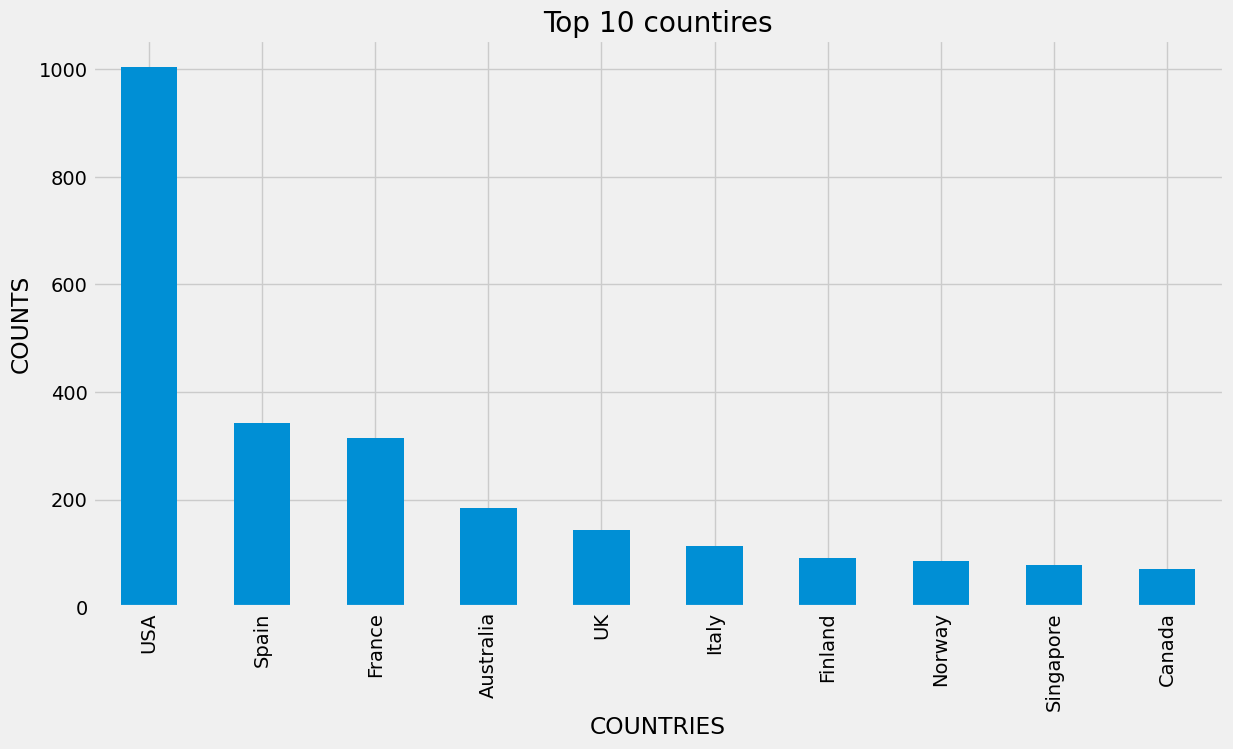

In [56]:
ax = df['COUNTRY'].value_counts() \
                           .head(10).plot(kind='bar', \
                           title= "Top 10 countires")
ax.set_xlabel('COUNTRIES')
ax.set_ylabel('COUNTS')
plt.show()